# KOSOVO CUSTOMS
---
## Trading bilance based on tariffs
**Features**
- **Regjimi EX1** -  Regjimi i eksportit të rregulltë
- **Regjimi IM4** -  Deklarata per qarkullim të lirë.
- **Netweight** - Pesha e një artikulli / produkti pa shtimin e paketimit
- **Taksa doganore** - Taksë e cila iu nënshtrohet mallrave me rastin e kalimit të kufirit dhe paguhet 10% në vlerë të mallit;
- **Taksa e akcizës** - Taksë e veçantë selektive që iu vihet një numri të caktuar të mallrave të tatueshme që lëshohen për konsum të lirë me qëllim të arritjes së efekteve të caktuara dhe paguhet në vlerë të mallit apo sipas njësisë matëse(specifike).
- **TVSH** - Taksë e cila mblidhet në kufi nga Shërbimi Doganor në emër të administratës tatimore dhe paguhet 18% në vlerë të mallit.
- **Sasia**: Sasia e përafërt të mallrave për t’u vendosur nën procedurë
- **Vlera**: Vlera e përafërt në euro të mallrave për t’u vendosur nën procedurë
---
### Llogaritja e pagesave te detyrimeve
**Pagesat e tatimeve per mallrat mund te llogariten duke perdorur elementet ne vijim:**
- Pershkrimin tarifor dhe kursin e tatimit;
- Sasine; dhe/ose
- Vleren 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Loading the data 

#### Loading export -> data 2018(Jan-Dec) - 2021(Jan-Feb)

In [2]:
df_export_2018 = pd.read_excel('DATA/Export/Export-2018.xlsx')

In [3]:
df_export_2019 = pd.read_excel('DATA/Export/Export-2019.xlsx') 

In [4]:
df_export_2020 = pd.read_excel('DATA/Export/Export-Janar-Dhjetor-2020.xlsx')

In [5]:
df_export_2021 = pd.read_excel('DATA/Export/Export-Janar-Shkurt-2021.xlsx')

In [6]:
export_df = pd.concat([df_export_2018,df_export_2019,df_export_2020],
                      axis=0).reset_index(drop=True)

In [ ]:
export_df.info()

#### Loading import data -> 2018(Jan-Dec) - 2021(Jan-Feb)

In [2]:
df_import_2018 = pd.read_excel('DATA/Import/Import-2018.xlsx')

In [3]:
df_import_2019 = pd.read_excel('DATA/Import/Import-2019.xlsx')

In [4]:
df_import_2020 = pd.read_excel('DATA/Import/Import-Janar-Dhjetor-2020.xlsx')

In [5]:
df_import_2021 = pd.read_excel('DATA/Import/Import-Janar-Shkurt-2021.xlsx')

In [6]:
import_df = pd.concat([df_import_2018,df_import_2019,df_import_2020,df_import_2021],
                      axis=0).reset_index(drop=True)

In [7]:
import_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637744 entries, 0 to 637743
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   VITI            637744 non-null  int64  
 1   MUAJI           637744 non-null  int64  
 2   Regjimi         637744 non-null  object 
 3   Origjina        637744 non-null  object 
 4   Kodi Tarifor    637599 non-null  object 
 5   Sasia           193093 non-null  float64
 6   Vlera Mallrave  637744 non-null  float64
 7   Netweight       637744 non-null  float64
 8   Taksa Doganës   637744 non-null  float64
 9   Taksa Akcizës   637744 non-null  float64
 10  Taksa TVSH-së   637744 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 53.5+ MB


## Exploratory Data Analysis

In [8]:
import_df[import_df['MUAJI'] < 3]['VITI'].value_counts()

2021    33522
2020    30997
2019    28461
2018    27684
Name: VITI, dtype: int64

<AxesSubplot:xlabel='VITI', ylabel='count'>

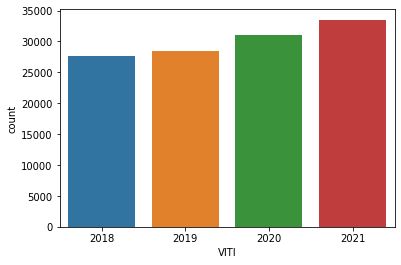

In [9]:
sns.countplot(x=import_df[import_df['MUAJI'] < 3]['VITI'])

In [11]:
import_df['Të hyrat'] = import_df['Taksa Doganës'] + import_df['Taksa Akcizës'] + import_df['Taksa TVSH-së']

In [12]:
import_df[(import_df['VITI'] == 2019) & (import_df['MUAJI'] < 3)]['Të hyrat'].sum()

137284280.88000003

In [13]:
import_df[(import_df['VITI'] == 2018) & (import_df['MUAJI'] < 3)]['Të hyrat'].sum()

129912530.72

In [14]:
import_df[(import_df['VITI'] == 2020) & (import_df['MUAJI'] < 3)]['Të hyrat'].sum()

154256644.14000002

In [15]:
import_df[(import_df['VITI'] == 2021)]['Të hyrat'].sum()

163386992.51999998

In [17]:
import_df[(import_df['VITI'] == 2020)]['Të hyrat'].sum()

1041083075.49

In [18]:
import_df[(import_df['VITI'] == 2019)]['Të hyrat'].sum()

1154597295.82

In [19]:
import_df[(import_df['VITI'] == 2018)]['Të hyrat'].sum()

1101353967.32

## Test

In [43]:
df = import_df.drop(['Regjimi','Kodi Tarifor','Sasia','Origjina'],axis=1)

In [46]:
df.head()

,VITI,MUAJI,Vlera Mallrave,Netweight,Taksa Doganës,Taksa Akcizës,Taksa TVSH-së,Të hyrat
0,2018,1,3.083592e+05,5790780.0,0.00,0.00,55504.44,55504.44
1,2018,1,6.787577e+05,421599.0,67875.49,0.00,134393.08,202268.57
2,2018,1,2.271547e+06,4122237.0,0.00,1807457.04,734219.95,2541676.99
3,2018,1,2.387331e+05,434230.0,0.00,110886.90,62931.53,173818.43
4,2018,1,2.932013e+04,1790.0,2931.46,0.00,5765.84,8697.30


In [51]:
import_df.shape

(637744, 12)

In [50]:
df.shape

(637744, 8)

In [49]:
df[df['VITI'] == 2021]

,VITI,MUAJI,Vlera Mallrave,Netweight,Taksa Doganës,Taksa Akcizës,Taksa TVSH-së,Të hyrat
604222,2021,1,6686.60000,4801.67,0.00,0.0,1203.59,1203.59
604223,2021,1,54256.66000,26415.05,0.00,0.0,9766.21,9766.21
604224,2021,1,44318.22910,16895.14,3810.14,0.0,8663.13,12473.27
604225,2021,1,1583.65714,1791.90,152.95,0.0,312.59,465.54
604226,2021,1,7016.18250,3293.68,414.06,0.0,1337.44,1751.50
...,...,...,...,...,...,...,...,...
637739,2021,2,162.16000,36.00,16.22,0.0,32.11,48.33
637740,2021,2,1339.72000,74.55,133.97,0.0,265.26,399.23
637741,2021,2,57560.00000,47300.00,0.00,0.0,0.00,0.00
637742,2021,2,3738.03000,640.00,373.80,0.0,740.13,1113.93


In [53]:
df = df.drop(df[df['VITI'] == 2021].index)

In [67]:
year_per_month_df = pd.DataFrame(df.groupby(['VITI','MUAJI'])['Të hyrat'].sum())
# df.xs(1,level='Num')

In [69]:
year_per_month_df

Të hyrat
VITI MUAJI              
2018 1      6.295375e+07
     2      6.695879e+07
     3      8.044948e+07
     4      8.891189e+07
     5      9.820882e+07
     6      9.995776e+07
     7      1.085523e+08
     8      1.143962e+08
     9      1.004815e+08
     10     9.257467e+07
     11     8.793891e+07
     12     9.996988e+07
2019 1      6.638826e+07
     2      7.089602e+07
     3      9.164536e+07
     4      9.390469e+07
     5      1.068003e+08
     6      9.098053e+07
     7      1.163203e+08
     8      1.155498e+08
     9      9.759060e+07
     10     1.000204e+08
     11     9.435868e+07
     12     1.101424e+08
2020 1      7.361653e+07
     2      8.064011e+07
     3      7.948956e+07
     4      6.206265e+07
     5      8.196477e+07
     6      9.026015e+07
     7      9.428471e+07
     8      8.391061e+07
     9      9.722633e+07
     10     1.000806e+08
     11     8.779003e+07
     12     1.097571e+08

In [68]:
year_per_month_df.loc[2018]

,Të hyrat
MUAJI,
1,6.295375e+07
2,6.695879e+07
3,8.044948e+07
4,8.891189e+07
5,9.820882e+07
6,9.995776e+07
7,1.085523e+08
8,1.143962e+08
9,1.004815e+08


In [80]:
df_test = year_per_month_df.reset_index()

---------
---------
----
----
---------------------------------

In [7]:
export_df

,VITI,MUAJI,Regjimi,Destinimi Final,Kodi Tarifor,Sasia,Vlera Mallrave,Netweight
0,2018,1,EX1,AL - SHQIPËRI,"3920102500 - Film tjeter polietileni, me trash...",NaN,3093.320000,909.80
1,2018,1,EX1,AL - SHQIPËRI,3923210010 - Thase dhe qese plastike (prej pol...,NaN,2396.140000,1396.00
2,2018,1,EX1,AL - SHQIPËRI,4811419000 - Letër dhe karton i gomuar vetngji...,NaN,330.700000,84.00
3,2018,1,EX1,AL - SHQIPËRI,"3401190000 - Sapun ne kallepe, jo per perdorim...",NaN,6720.000000,8388.00
4,2018,1,EX1,AL - SHQIPËRI,"8544421000 - Percjellesa elektrike, per voltaz...",NaN,37.366002,10.00
...,...,...,...,...,...,...,...,...
56509,2020,12,EX1,XS - SËRBIA,"3917390090 - Tuba fleksibel prej plastike, të ...",NaN,7288.120000,21885.00
56510,2020,12,EX1,AL - SHQIPËRI,2106909800 - Pergatitje ushqimore te paspecifi...,NaN,3883.000000,142.10
56511,2020,12,EX1,NL - HOLANDA,7616999000 - Artikuj te tjere prej alumini,NaN,59016.730000,450.32
56512,2020,12,EX1,NL - HOLANDA,8471705090 - Hard disk drives (HDD) per kompju...,1.0,100.440000,0.10


In [8]:
df = export_df.drop(['VITI','MUAJI','Regjimi','Vlera Mallrave','Netweight'],axis=1)

In [10]:
df.isna().sum()

Destinimi Final        0
Kodi Tarifor          12
Sasia              39840
dtype: int64

In [12]:
df.dropna(axis=0,subset = ['Kodi Tarifor'],inplace=True)

In [13]:
df['Destinimi Final'] = df['Destinimi Final'].apply(lambda x: x[:2])

In [14]:
df.head()

,Destinimi Final,Kodi Tarifor,Sasia
0,AL,"3920102500 - Film tjeter polietileni, me trash...",NaN
1,AL,3923210010 - Thase dhe qese plastike (prej pol...,NaN
2,AL,4811419000 - Letër dhe karton i gomuar vetngji...,NaN
3,AL,"3401190000 - Sapun ne kallepe, jo per perdorim...",NaN
4,AL,"8544421000 - Percjellesa elektrike, per voltaz...",NaN


In [16]:
df['Destinimi Final'].nunique()

131

In [10]:
# df['Kodi Tarifor'] = df['Kodi Tarifor'].str.split("-",expand=True)[0]

In [17]:
df = df.groupby(['Destinimi Final','Kodi Tarifor'])['Sasia'].sum().unstack().reset_index().fillna(0).set_index('Destinimi Final')

In [18]:
df

Kodi Tarifor,0102213000 - Lope race per riprodhim,"0201100000 - Mish gjedhi i fresket (ose i ftohur), trup ose gjysëm trup","0201209000 - Mish gjedhi i fresket (ose i ftohur), prerje me kocka, te ndyshme nga Çerekët","0201300000 - Mish gjedhi i fresket (ose i ftohur), prerje pa kocka","0202301000 - Mish gjedhi i ngrire, prerje pa kocka (nga cereket e plote ose te kompensuar)","0202309000 - Mish gjedhi i ngrire, prerje pa kocka, te tjera te ndyshme nga cereket po qafa, germazi, gjoksi","0207131000 - Mish pule, i fresket ose i ftohte, prerje pa kocka","0207146000 - Kofshe prej pules dhe prerjet prej tyre, te ngrira","0207149900 - Të tjera te brendshme prej pules, te ngrira","0210201000 - Mish gjedhi, prerje me kocka, të kriposura, ne shellire, të thara ose te tymosura",...,9619007900 - Të tjera\n,9619008100 - Pecetat dhe lines peceta për femije \n,"9619008900 - Të tjera (per shembull, artikujtë për kujdes ndaj mospërmbajtes)\n",9620009900 - Te tjera,"9701100000 - Pikturat, vizatimet dhe pastelat",9701900000 - Të tjera,"9703000000 - Skulpturat dhe statujat origjinale, në çdo material","9705000000 - Koleksionet dhe pjesë të koleksionistëve me interes zoologjik, botanik, mineralogjik, anatomik, historik, arkeologjik, paleontologjik, etnografik apo numismatik",9805000000 - Mallra te perziera,9894000000 - Mobilje
Destinimi Final,,,,,,,,,,,,,,,,,,,,,
AD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AL,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
XC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
XS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
df = df.applymap(lambda x: False if x <= 0 else True)

In [26]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [27]:
frequent_itemsets = apriori(df,min_support=0.1,use_colnames=True)

In [28]:
frequent_itemsets

,support,itemsets
0,0.160305,"(2201101100 - Uje mineral natyral, jo i karbon..."
1,0.312977,(2202100000 - Pije freskuese (uje me shtesa em...
2,0.106870,(2202991199 - Te tjera )
3,0.114504,"(2204219700 - Vere e bardhe, nga jashte BE, jo..."
4,0.114504,"(2204219800 - Vere e kuqe, nga jashte BE, jo n..."
...,...,...
432,0.106870,"(6204499000 - Fustane per gra dhe vajza, prej ..."
433,0.106870,"(6204499000 - Fustane per gra dhe vajza, prej ..."
434,0.106870,"(6204499000 - Fustane per gra dhe vajza, prej ..."
435,0.106870,"(6204499000 - Fustane per gra dhe vajza, prej ..."


In [29]:
rules = association_rules(frequent_itemsets,metric="lift",min_threshold=1)

In [57]:
rules[(rules['lift'] >= 6) & (rules['confidence'] >= 0.8)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
46,"(2204219700 - Vere e bardhe, nga jashte BE, jo...","(2204219800 - Vere e kuqe, nga jashte BE, jo n...",0.114504,0.114504,0.114504,1.000,8.733333,0.101393,inf
47,"(2204219800 - Vere e kuqe, nga jashte BE, jo n...","(2204219700 - Vere e bardhe, nga jashte BE, jo...",0.114504,0.114504,0.114504,1.000,8.733333,0.101393,inf
188,"(8422110000 - Makinat për larjen e pjatave, të...",(6601100000 - Çadra per kopshte dhe veranda),0.122137,0.145038,0.106870,0.875,6.032895,0.089156,6.839695
197,"(8516605000 - Pllakat për gatim, unazat dhe pl...",(6907210000 - Me koeficient absorbues te ujit ...,0.106870,0.152672,0.106870,1.000,6.550000,0.090554,inf
202,"(8422110000 - Makinat për larjen e pjatave, të...","(7308300000 - Dyer, dritare dhe skeletet e tyr...",0.122137,0.129771,0.106870,0.875,6.742647,0.091020,6.961832
...,...,...,...,...,...,...,...,...,...
4085,"(8422110000 - Makinat për larjen e pjatave, të...","(6204499000 - Fustane per gra dhe vajza, prej ...",0.106870,0.106870,0.106870,1.000,9.357143,0.095449,inf
4087,"(8422110000 - Makinat për larjen e pjatave, të...","(6204499000 - Fustane per gra dhe vajza, prej ...",0.122137,0.106870,0.106870,0.875,8.187500,0.093817,7.145038
4089,"(8422110000 - Makinat për larjen e pjatave, të...","(6204499000 - Fustane per gra dhe vajza, prej ...",0.122137,0.106870,0.106870,0.875,8.187500,0.093817,7.145038
4091,"(8516605000 - Pllakat për gatim, unazat dhe pl...","(6204499000 - Fustane per gra dhe vajza, prej ...",0.106870,0.106870,0.106870,1.000,9.357143,0.095449,inf


In [48]:
rules_sort = rules.sort_values(['confidence','lift'],ascending = [False,False])